# Tarefa 3: Remoção de ruído de alta-frequência.

Para remover o ruido de alta-frequencia: Filtro Passa Baixo

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt      #fazer o plot
import numpy as np

from functools import partial
stem = partial(plt.stem, use_line_collection=True)

from scipy.signal import freqz, butter, lfilter

# Visualização do sinal com ruido - ecg_hfn.dat

In [2]:
fs = 1000

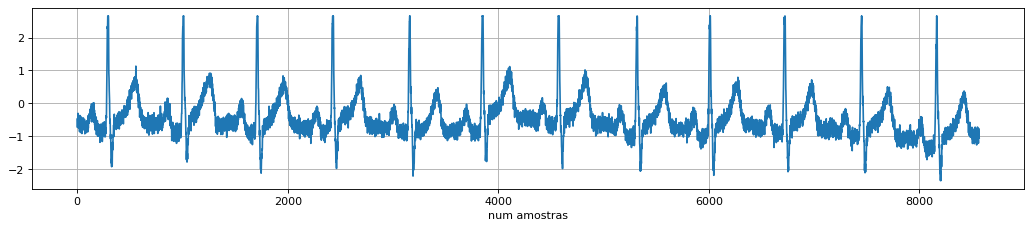

In [3]:
from matplotlib.pyplot import figure
# -- Sinal corrompido

figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
data = np.loadtxt('ecg_hfn.dat')
plt.plot(data,label='Sinal corrompido')
#plt.plot(t1, data, 'b')
plt.grid(True)
plt.xlabel('num amostras')
plt.show()

# Filtro Passa-baixo: Projecto do Filtro IIR

In [4]:
def butter_lowpass(low_cut, fs, order=5): # low_cut frequencia de corte  da freq analogica em hertz e a ordem do meu filtro : 5
    '''Nota: a função butter assume que a frequência de corte da especificação foi
    normalizada pela frequência de Nyquist'''
    nyquist = 0.5 * fs # freq nyquist é metade da freq de amostragem 
    low = low_cut / nyquist #normalizar em que a frequencia em pi = 1. low é digital e normalizada em pi que vale 1. freq correta = 1 * pi
    b, a = butter(order, low, btype='low') # butter -> calcula se eu der a ordem e a freq de corte e o tipo(low) ele retorna o b e a (butter?) em que b e a sao coeficientes do polinomio do numerador e denominador de H(z) ou H(s) -> depende, se tou a definir a freq do meu filtro anal ou digital
    return b, a 

#outra def de suporte
#dou sinal de entrada, freq de corte, fs e a ordem
#projeta o meu filtro b, a
def butter_low_filter(sinal, low_cut, fs, order=5):
    b, a = butter_lowpass(low_cut, fs, order=order)
    y = lfilter(b, a, sinal) # passo o meu polinomio e o sinal entrada e implementa o filtro, dá o sinal filtrado
    return y



### Visualização do sinal corrompido e do sinal filtrado

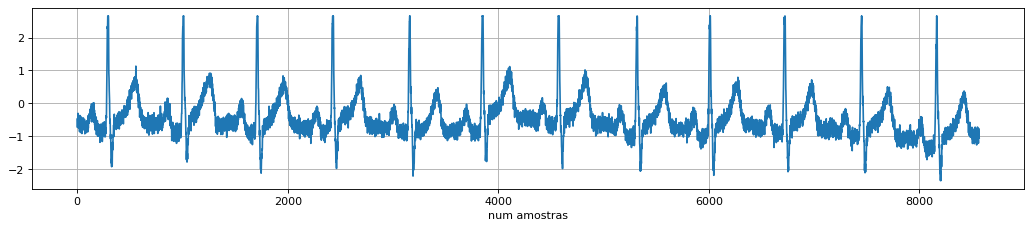

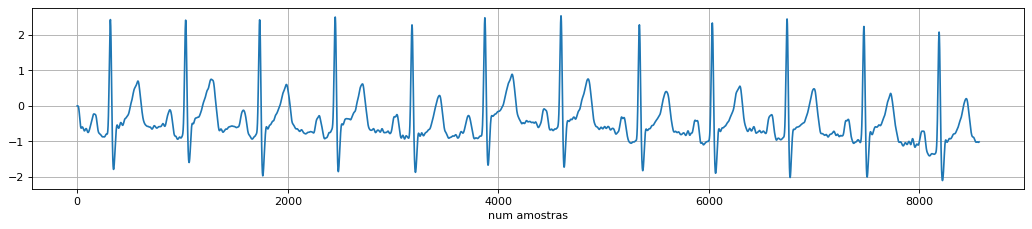

In [5]:
figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
data = np.loadtxt('ecg_hfn.dat')
plt.plot(data,label='Sinal corrompido')
#plt.plot(t1, data, 'b')
plt.grid(True)
plt.xlabel('num amostras')
plt.show()

low_cut = 30
order = 9
y = butter_low_filter(data, low_cut, fs, order=6)

figure(num=None, figsize=(16, 3), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y,label='Sinal Filtrado')
#plt.plot(t1, data, 'b')
plt.grid(True)
plt.xlabel('num amostras')
plt.show()

Após várias projeções do presente filtro para vários valores da ordem e da frequencia de corte, os valores escolhidos para a especificação do filtro passa baixo IIR para eliminar o ruído de alta frequencia foram:

In [6]:
low_cut = 30
ordem = 9

### Resposta em frequencia 

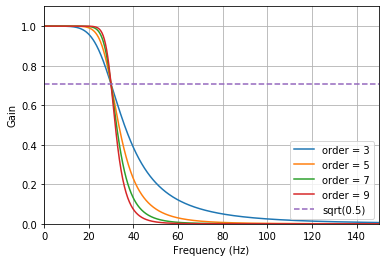

In [7]:
def lp_freq_resp(orders, low_cut, fs):
    plt.figure(1) # crio figura
    plt.clf()  # clear da imagem ativa no momento
    for order in orders:   # iterador, para cada ordem calculo o polinomio, 
        b, a = butter_lowpass(low_cut, fs, order=order)
        W, H = freqz(b, a, worN=2000)  #recebe o b e o a (polinomios), e o num de pontos, vai à representacao em z e retorna as amplitudes da resp do meu filtro
        # w -> amplitudes da resp do meu filtro H-> amostras do meu filtro e retorna as freq para qual calculo a ampli do meu filtro
        plt.axis([0, 150, 0, 1.1])
        plt.plot((fs * 0.5 / np.pi) * W, abs(H), label="order = %d" % order) # abs(H) modulo da resp do meu filtro
        # w omega é de freq digital vou converter na freq analogica e faco o plot para aquela ordem
    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)], '--', label='sqrt(0.5)') # desenho uma linha que passa na (sqtr(0.5)) = -3dB -> desenho uma linha que passa em -3dB porque é a posicao da minha freq de corte
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')
    
lp_freq_resp([3, 5, 7, 9], low_cut, fs)


No gráfico anterior encontra-se a resposta em frequência fo filtro IIR para várias ordens. A ordem esolhida, que apresenta melhor atenuação em torno da frequencia de corte, foi a ordem 9

### Diagrama de Polos e Zeros

(9, 9)

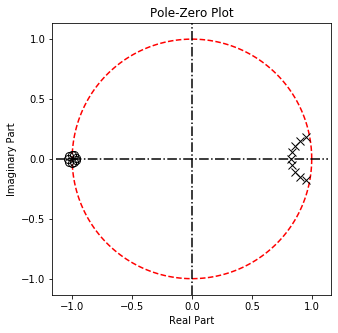

In [11]:
from plots import zplane # vou ao ficheiro

b, a = butter_lowpass(low_cut, fs, order)
zplane(b, a)

O diagrama de polos e zeros do presento filtro, apresenta 9 zeros e 9 polos, dentro do circulo unitário

# Filtro Passa-alto: Projecto do Filtro FIR

Nos filtros FIR, a resposta aproximada na frequencia é obtida diretamente.

## Especificação

A janela escolhida para a projeção do filtro FIR foi a janela de Keyser

### Visualização do sinal corrompido e do sinal filtrado

In [12]:
import matplotlib.pyplot as plt
import numpy as np

import scipy.signal as ss

nyquist = fs / 2.0
low_cut = 40
low = low_cut / nyquist # normalizada
width_n = 6 / nyquist # largura -> normalizada - banda de transição
ripple_db = 60.0   # ripple -> 


In [13]:
# calcular o num taps e o B -> kaiserord
#     passo a atenuacao e a largura do filtro banda e fornece o B porque as freq estao normalizadas
num_taps, beta = ss.kaiserord(ripple_db, width_n)
#calculo a ordem e o B

taps = ss.firwin(num_taps, low, window=('kaiser', beta)) # calculo os coeficientes -> taps
# ele vai apanhar o filtro ideal e multipicar a sua resp impulsional pela janela consoante se é pass baixo, alto ...
s_filtered = ss.lfilter(taps, 1.0, data) # filtro o meu sinal

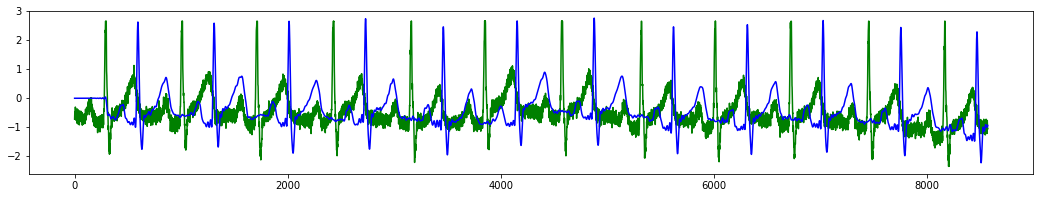

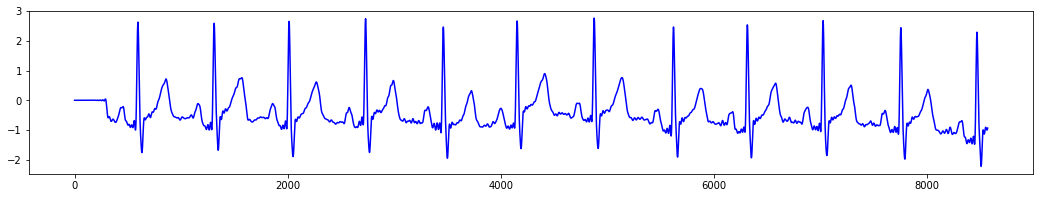

In [20]:
plt.figure(figsize=(18, 3))
plt.plot(data, 'g')
_ = plt.plot(s_filtered, 'b')

# verde o sinal original - corrompido
# azul o sinal filtrado

plt.figure(figsize=(18, 3))
_ = plt.plot(s_filtered, 'b')

# azul o sinal filtrado


Da vizualização dos graficos, e após várias tentativas para ajustar o valor da especificação do presente filtro, os valores correspondentes são: 

In [21]:
low_cut = 40
width = 6 # largura - banda de transição
ripple_db = 80.0   # ripple -> 

### Resposta em frequencia 

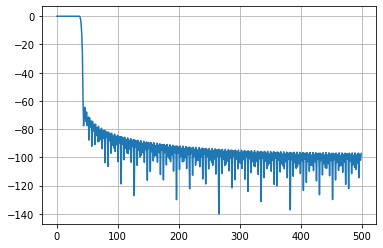

In [22]:
W, H = ss.freqz(taps, [1])

plt.figure()
plt.plot((fs * 0.5 / np.pi) * W, 20 * np.log10(abs(H)))
plt.grid()

# atenuacao de -80 dB está certo

Podemos ver que o ganho na banda passante é unitário e para frequencias superiores à frequencia de corte, 40 Hz, estas são atenuadas para valores superiores a 60 dB. 

### Diagrama de Polos e Zeros

(605, 303)

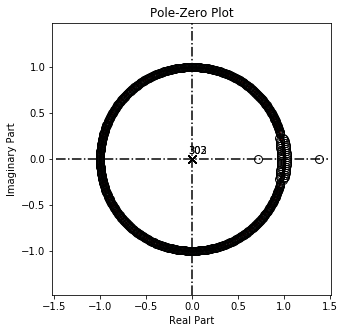

In [23]:
zplane(taps, [1])

O diagrama de polos e zeros para o presente filtro, apresenta 605 zeros e 303 polos. Os polos estão concentrados dentro do cirulo unitário na origem.

### Filtros IIR vs FIR. Qual usar ?

A escolha do melhor filtro dependerá da especificação, por exemplo, da linearidade da fase, banda de transição ou da ordem.

Através da visualização da filtragem do sinal corrompido pelos filtros, o sinal filtrado pelo filtro FIR e IIR são equivalentes, mas a especificação é diferente. A ordem do filtro FIR é de 605 e do filtro IIR é de 9. Uma vez que quanto maior a ordem de um filtro maior é a sua dificuldade de o projetar, podiamos optar por utilizar um filtro IIR. 